# Principal component analysis in Python

## Reminder
Principal component analysis (PCA) is a technique used in 
- approximation,
- signal processing (noise reduction, compression…) 

but which can also lead to useful results in data analysis with a few aims :
- visualisation and data exploration
- dimensionality reduction
- pattern classification, and more specifically in unsupervised clustering

## Mathematical basis
The basis of the PCA is to find the linear representation of the data that minimise the quadratic error while using a limited number of projection.

We assume that we have a set of multivariate datapoints $(\mathbf{x}_{i})_{i \in [[1, m]]}$ living in $\mathbb{R}^{n}$

### Order 0 approximation
The best _single point_ to represent it in term of quadratic error is its mean.

That is the point $\mathbf{m}$ that minimise $\sum_{i=1}^{m} ||\mathbf{m} - \mathbf{x}_i||^2$ is the empirical mean of the distribution : $\mathbf{m} = \frac{1}{m}\sum_{i=1}^{m}\mathbf{x}_i$

### Order 1, 1D approximation
We try to perform a linear (order 1) approximation of the data in 1D (that is as a monovariate dataset). In other word we try to find the vector $\mathbf{e}$ ($||\mathbf{e}||=1$) such that :

$$ \sum_{i=1}^{m}|| \mathbf{x}_i - (\mathbf{m} + a_i\mathbf{e})||^2 $$

You have seen that the min of this quadratic error is attained for :
$$a_i = <(\mathbf{x}_i - \mathbf{m}),\mathbf{e}> $$
and most interestingly that $\mathbf{e}$ is an eigenvector attached to the largest eigenvalue of the scatter matrix of the dataset : 
$$\mathbf{S} = \sum_{i=1}^{m}(\mathbf{x}_i - \mathbf{m})(\mathbf{x}_i - \mathbf{m})^t$$



### Order 1, kD approximation
We want now to minimise the quadratic error of a k-dimensional linear approximation of the dataset :

$$ \sum_{i=1}^{m}|| \mathbf{x}_i - (\mathbf{m} + \sum_{j=1}^{k}a_{i,k}\mathbf{e}_k)||^2 $$ 


We can extend the result of the 1D linear approximation. This leads to project the dataset on the (partial) basis made of the $k$ eigenvector corresponding to the $k$ largest eigenvalues of the dataset's scatter matrix $\mathbf{S}$.

As $\mathbf{S}$ is a positive semi-definite matrix, the eigenvectors form a orthogonal basis. Hence the $(\mathbf{e}_k)_{k\in[[1, j]]}$ form a (partial) orthonormal basis of $\mathbb{R}^n$

### Principal component analysis

Performing principal component analysis is all about computing the scatter matrix from the dataset and then performing the eigenvector decomposition of this matrix.

If $\mathbf{X}_\mathsf{c}$ is the matrix with row $i$ containing $(\mathbf{x}_i - \mathbf{m})$, that is the _centered data_, then one can compute $\mathbf{S} = \mathbf{X}_\mathsf{c}^t\mathbf{X}_\mathsf{c}$ as a simple outer product.

We still have to compute the eigenvector decomposition once $\mathbf{S}$ is computed :

$$ \mathbf{S} = \mathbf{P}^t \mathbf{D} \mathbf{P}$$

With $\mathbf{P}$ being a $n \times n$ *orthogonal matrix*, that is $\mathbf{P}^{-1} = \mathbf{P}^t$. In other words a matrix corresponding the change into another orthonormal basis (considering the initial basis is itself orthonormal)

### Isotropic or anisotropic data / homogenuos or heterogenuous dimensions
Doing a PCA is essentially performing a rotation of the basis (changing from a orthonormal basis to another one) such that the scatter matrix, $\mathbf{S}$ becomes diagonal.

This rotation makes senses only if the dataset space is isotropic (we can consider that the canonical basis is already orthonormal), or in other words that the dataset space is made of homogenuous dimensions.

Otherwise the _rotation_ might have no sense since it require performing linear combination of value which are in different unit and even worse _dimension_ (mixing **m** with **kg**, or the like)

### Quadratic error / isotropic loss
Another way to understand the same question : PCA objective is to minimise **quadratic error**. The main specificity (and advantage) of **quadratic error** is that it is **invariant by rotation** of the basis.

In other words, one would consider **quadratic error** mostly to benefit from an **isotropic loss function**.

## The _iris_ dataset example

Reading in the data : 150 samples of 3 different species of _iris_, each sample caracterised by 4 length (_in cm_).

In [3]:
## Getting the dataset :
import pandas
import numpy

iris = pandas.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                       header=None,
                       names=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'species'],
                       sep=',')
## A bit of displaying :
print(iris.head())
print(iris.tail())

   sepal_len  sepal_wid  petal_len  petal_wid      species
0        5.1        3.5        1.4        0.2  Iris-setosa
1        4.9        3.0        1.4        0.2  Iris-setosa
2        4.7        3.2        1.3        0.2  Iris-setosa
3        4.6        3.1        1.5        0.2  Iris-setosa
4        5.0        3.6        1.4        0.2  Iris-setosa
     sepal_len  sepal_wid  petal_len  petal_wid         species
145        6.7        3.0        5.2        2.3  Iris-virginica
146        6.3        2.5        5.0        1.9  Iris-virginica
147        6.5        3.0        5.2        2.0  Iris-virginica
148        6.2        3.4        5.4        2.3  Iris-virginica
149        5.9        3.0        5.1        1.8  Iris-virginica


notice that each variable is a length, in _cm_, hence we are in the case that all variables are of the same _physical dimension_, and _unit_. The last variable (_column_) is a (_dimension less_) classification label.

In [4]:
## Isolating the variables (columns 0:4) and computing the scatter matrix
X = iris.iloc[:, 0:4].values
## From the classification of each sample 
cl = iris.iloc[:, 4].values

print(numpy.unique(cl))
print(iris.columns.values)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
['sepal_len' 'sepal_wid' 'petal_len' 'petal_wid' 'species']


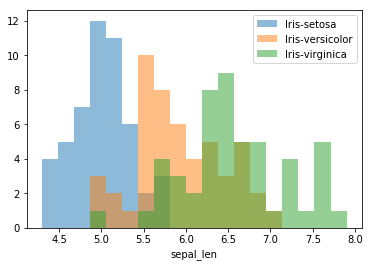

In [7]:
## Some visualisation
import numpy
import matplotlib
import matplotlib.pyplot as pyplot
%matplotlib inline

bins=numpy.linspace(X[::, 0].min(),X[::, 0].max(), 20)

for c in numpy.unique(cl) :
    pyplot.hist(X[cl==c, 0], bins, alpha=0.5, label=c)
pyplot.legend(loc='upper right')
pyplot.xlabel(iris.columns.values[0])
pyplot.show()

In [ ]:
### Plotting all 4 histograms
fig, axes = pyplot.subplots(nrows=1, ncols=4, figsize=[15,4])

for col in range(0, 4):
### Computing bins here
    for c in numpy.unique(cl) :
### Displaying each class at once, so they «overlap»

### Displaying the legend and axis to «finish up» the figures.
    axes[col].legend(loc='upper right')
    axes[col].set_xlabel(iris.columns.values[col])

In [ ]:
## Computing the _centered_ scatter matrix :
means = #### Computing the mean vector
print("mean values : ", means)
S = #### Computing the data scatter matrix
print("Scatter matrix:")
print(S)

In [ ]:
## Performing the spectral decomposition
import numpy.linalg
pca_vals, pca_vects = ### Where is spectral decomposition in numpy ? (hint ^)
print("PCA values :", pca_vals)
print("PCA directions :\n", pca_vects)

### Scatter matrix _vs._ covariance matrix
Indeed if we note $\Sigma$ the coviarance matrix of the data set we then have

$$ \Sigma = \frac{1}{n-1}\mathbf{S} $$

Since the eigenvector decomposition of a matrix is scale invariant (only the eigenvalues are affected by the scale), one can perform this decomposition on the covariance matrix to get the PCA

In [ ]:
Sigma = numpy.cov(X.T) ## This is «also» performs the data centering
pca_vals, pca_vects = ### Again …
print("PCA values (cov):", pca_vals)
print("PCA values (scatter):", pca_vals * (X.shape[0]-1)) ## barely rescaling the eigenvalues
print("PCA directions :\n", pca_vects)

### Projection(s) on the PCA
Performing the PCA of the dataset corresponds to finding an _adapted_ orthonormal basis for the dataset : _adapted_ here means that the basis is such that the scatter matrix of the dataset (in this basis) is diagonal.

Once this (_partial_-)basis is found, the most natural thing is to apply this change of basis to the dataset. Since the (partial-)basis is orthonormal, this can simply be done by projecting the data on found vectors.

**NB** : this indeed make sense on the _centered data_, not the raw dataset

In [ ]:
## Computing the projection using a «simple» mamtrix product
X_dec = (X - means) @ pca_vects
print(X_dec[0:10, ::])

In [ ]:
### Histograms on projections :
fig, axes = pyplot.subplots(nrows=1, ncols=4, figsize=[15,4])

for col in range(0, 4):
### As above

In [ ]:
### axis pairwise scatter plot

numpy.array(pandas.factorize(iris['species']))

pyplot.scatter(X_dec[::, 0], X_dec[::, 1], c=pandas.factorize(iris['species'])[0])
pyplot.xlabel("PCA axis 1")
pyplot.ylabel("PCA axis 2")

In [ ]:
## A bit better printout :
pyplot.figure(figsize=[10,7])

for c in numpy.unique(cl) :
    pyplot.scatter(X_dec[cl==c, 0], X_dec[cl==c, 1], label=c, alpha=0.5)
pyplot.legend(loc='upper right')
pyplot.xlabel("PCA axis 1")
pyplot.ylabel("PCA axis 2")

pyplot.show()

### Solving the anisotropic case
When the native data, hence the _centered_ data, is not homogenuous a solution is to bring it to homogeneity in dimension by transforming each variable into a _dimension less_ value. This is typically done by dividing a variable by a value of the exact same _physical dimension_ (and unit). This produce _dimension less_ variables that express the characteristics of each datapoint relatively to a _scale_ that is _arbitrary_ for each variable.

### Normalised/standardised data
A standard way to find a _scale_ that can be applied to each variable is to take, for each variable, the _scale_ to be the **standard deviation** of this variable.

### Weighting
Transforming each variable to a _dimension less_ variable also corresponds to setting a weigth on each variable such that they are all _in fine_ on a **common** _relative_ dimension. In this contexte, **normalisation/standardisatin** correspond to giving the same weight to every variable.

In [ ]:
import pandas
import numpy

USArrests = pandas.read_csv('USArrests.csv', header=0, sep=";", decimal=",")
USArrests.head(5)

In [ ]:
## Isolating the variables (columns 0:4) and computing the scatter matrix
Vars = USArrests.iloc[:, 1:5].values
## From the classification of each sample 
states = USArrests.iloc[:, 0].values

print(numpy.unique(states))
print(USArrests.columns.values)
print(Vars[:5,])

In [ ]:
import matplotlib
import matplotlib.pyplot as pyplot
%matplotlib inline

fig, axes = pyplot.subplots(nrows=1, ncols=4, figsize=[15,4])

for col in range(0, 4):
### Display the 4 histograms

In [ ]:
## Computing the _centered_ scatter matrix :
USA_means = ##### Complete here 
print("mean values : ", USA_means)
USA_S = ##### Complete here
print("Scatter matrix:")
print(USA_S)

#### First not caring about _heterogeneity_ of dimensions
No _standardisation_ (or _scaling_) of the data is performed before applying PCA

In [ ]:
## Performing the spectral decomposition
import numpy.linalg
pca_vals_no_scale, pca_vects_no_scale = numpy.linalg.eig(USA_S)
print("PCA values :", pca_vals_no_scale)
print("PCA directions :\n", pca_vects_no_scale)

In [ ]:
Vars_dec_no_scale = #### Complete here
print(Vars_dec_no_scale[0:10, ::])

In [ ]:
pyplot.figure(figsize=[10, 7])
pyplot.scatter(Vars_dec_no_scale[::, 0], Vars_dec_no_scale[::, 1])
pyplot.xlabel("PCA axis 1")
pyplot.ylabel("PCA axis 2")

#### Performing some scalign
The idea is to try to get all the initial variable on a joint _scale_, basically deviding each variable by its standard deviation

In [ ]:
USA_sds = numpy.std(Vars, axis=0)
print("SD values : ", USA_sds)
USA_S_scaled = ####
print("Scatter matrix: (standardised)")
print(USA_S_scaled)

In [ ]:
pca_vals_scaled, pca_vects_scaled = #### 
print("PCA values :", pca_vals_scaled)
print("PCA directions :\n", pca_vects_scaled)

In [ ]:
Vars_dec_scaled = #### 
print(Vars_dec_scaled[0:10, ::])

In [ ]:
pyplot.figure(figsize=[10, 7])
pyplot.scatter(Vars_dec_scaled[::, 0], Vars_dec_scaled[::, 1])
pyplot.xlabel("PCA axis 1")
pyplot.ylabel("PCA axis 2")

## Shortcut

Indeed the ```scikit``` python module includes a direct implementation of the PCA (not in kit) : ```sklearn.decomposition.PCA```

In [5]:
import sklearn.decomposition

iris_pca = sklearn.decomposition.PCA()
iris_proj = iris_pca.fit_transform(X)

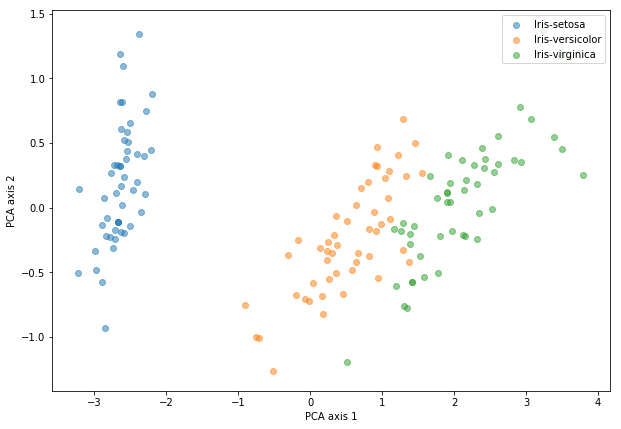

In [9]:
## A bit better printout :
pyplot.figure(figsize=[10,7])

for c in numpy.unique(cl) :
    pyplot.scatter(iris_proj[cl==c, 0], iris_proj[cl==c, 1], label=c, alpha=0.5)
#for c in numpy.unique(cl) :
#    pyplot.scatter(X_dec[cl==c, 0], -X_dec[cl==c, 1], label=c, alpha=1, marker='.')
pyplot.legend(loc='upper right')
pyplot.xlabel("PCA axis 1")
pyplot.ylabel("PCA axis 2")

pyplot.show()

In [ ]:
print("PCA directions :\n", pca_vects)
print("Using SK-learn version :\n", iris_pca.components_)